# Hello, Numerai

Hello and welcome to the Numerai Data Science Tournament!

This notebook is designed to help you build your first machine learning model and start competing the tournament.

In this notebook we will
1. Download and explore the Numerai dataset
2. Train and evaluate your first machine learning model
3. Deploy your model to start making live submissions

In [1]:
# Install dependencies
!pip install -q numerapi pandas pyarrow matplotlib lightgbm scikit-learn cloudpickle==2.2.1 scipy==1.10.1

# Inline plots
%matplotlib inline

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.9/58.9 kB 1.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34.1/34.1 MB 16.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 42.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
dask 2024.12.1 requires cloudpickle>=3.0.0, but you have cloudpickle 2.2.1 which is incompatib

## 1. Dataset  

At a high level, the Numerai dataset is a tabular dataset that describes the stock market over time. It is compiled from high-quality (and expensive) data that might be difficult for individuals to obtain.

The unique thing about Numerai's dataset is that it is `obfuscated`, which means that the underlying stock ids, feature names, and target definitions are anonymized. This makes it so that we can give this data out for free and so that it can be modeled without any financial domain knowledge (or bias!).

### Listing the datasets
Firstly, take a look at the files Numerai offers below:

In [3]:
!pip uninstall -y numpy
!pip install numpy==1.23.5

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.1/17.1 MB 91.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn

In [2]:
# Initialize NumerAPI - the official Python API client for Numerai
from numerapi import NumerAPI
napi = NumerAPI()

# list the datasets and available versions
all_datasets = napi.list_datasets()
dataset_versions = list(set(d.split('/')[0] for d in all_datasets))
print("Available versions:\n", dataset_versions)

# Set data version to one of the latest datasets
DATA_VERSION = "v5.0"

# Print all files available for download for our version
current_version_files = [f for f in all_datasets if f.startswith(DATA_VERSION)]
print("Available", DATA_VERSION, "files:\n", current_version_files)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Downloading datasets

The `features.json` file contains metadata about features in the dataset including:
- statistics on each feature
- helpful sets of features
- the targets available for training

Let's download it and take a look:

In [ ]:
import json

# download the feature metadata file
napi.download_dataset(f"{DATA_VERSION}/features.json")

# read the metadata and display
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))

v5.0/features.json: 291kB [00:00, 1.07MB/s]                          

feature_sets 17
targets 37


### Feature Sets & Groups
As you can see there are many features and targets to choose from.

Instead of training a model on all 2000+ features, let's pick a subset of features to analyze.

Here are a few starter sets Numerai offers:

- `small` contains a minimal subset of features that have the highest [feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

- `medium` contains all the "basic" features, each unique in some way (e.g. P/E ratios vs analyst ratings)

- `all` contains all features in `medium` and their variants (e.g. P/E by country vs P/E by sector)

Let's take a look at the medium feature set:

In [ ]:
feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
  print(feature_set, len(feature_sets[feature_set]))

small 42
medium 705
all 2376



The `medium` set seems much more reasonable.

Using it will speed up model training and reduce memory usage (required for Colab free tier).

Let's load the training data for just the medium feature set:

In [ ]:
import pandas as pd

# Define our feature set
feature_set = feature_sets["small"]
# use "medium" or "all" for better performance. Requires more RAM.
# features = feature_metadata["feature_sets"]["medium"]
# features = feature_metadata["feature_sets"]["all"]

# Download the training data - this will take a few minutes
napi.download_dataset(f"{DATA_VERSION}/train.parquet")

# Load only the "medium" feature set to
# Use the "all" feature set to use all features
train = pd.read_parquet(
    f"{DATA_VERSION}/train.parquet",
    columns=["era", "target"] + feature_set
)

# Downsample to every 4th era to reduce memory usage and speedup model training (suggested for Colab free tier)
# Comment out the line below to use all the data
train = train[train["era"].isin(train["era"].unique()[::4])]

v5.0/train.parquet: 2.37GB [01:40, 23.6MB/s]                            



### Training data

Each row represents a stock at a specific point in time:
- `id` is the stock id
- `era` is the date
- `target` is a measure of future returns for that stock
- `features` describe the attributes of the stock (eg. P/E ratio) for that date

In [ ]:
train

era  target  feature_able_deprived_nona  \
id                                                           
n0007b5abb0c3a25  0001    0.25                           1   
n003bba8a98662e4  0001    0.25                           3   
n003bee128c2fcfc  0001    0.75                           1   
n0048ac83aff7194  0001    0.25                           1   
n0055a2401ba6480  0001    0.25                           3   
...                ...     ...                         ...   
nffc2d5e4b79a7ae  0573    0.00                           3   
nffc9844c1c7a6a9  0573    0.25                           0   
nffd79773f4109bb  0573    0.50                           3   
nfff6ab9d6dc0b32  0573    0.25                           3   
nfff87b21e4db902  0573    0.50                           2   

                  feature_ablest_inflexional_egeria  \
id                                                    
n0007b5abb0c3a25                                  2   
n003bba8a98662e4                                  2   
n003bee128c2fcfc                                  2   
n0048ac83aff7194                                  2   
n0055a2401ba6480                                  2   
...                                             ...   
nffc2d5e4b79a7ae                                  3   
nffc9844c1c7a6a9                                  1   
nffd79773f4109bb                                  1   
nfff6ab9d6dc0b32                                  1   
nfff87b21e4db902                                  0   

                  feature_absorbable_hyperalgesic_mode  \
id                                                       
n0007b5abb0c3a25                                     3   
n003bba8a98662e4                                     4   
n003bee128c2fcfc                                     0   
n0048ac83aff7194                                     3   
n0055a2401ba6480                                     3   
...                                                ...   
nffc2d5e4b79a7ae                                     2   
nffc9844c1c7a6a9                                     2   
nffd79773f4109bb                                     1   
nfff6ab9d6dc0b32                                     0   
nfff87b21e4db902                                     0   

                  feature_accoutered_revolute_vexillology  \
id                                                          
n0007b5abb0c3a25                                        2   
n003bba8a98662e4                                        1   
n003bee128c2fcfc                                        2   
n0048ac83aff7194                                        4   
n0055a2401ba6480                                        4   
...                                                   ...   
nffc2d5e4b79a7ae                                        2   
nffc9844c1c7a6a9                                        1   
nffd79773f4109bb                                        1   
nfff6ab9d6dc0b32                                        0   
nfff87b21e4db902                                        4   

                  feature_acetose_crackerjack_needlecraft  \
id                                                          
n0007b5abb0c3a25                                        3   
n003bba8a98662e4                                        0   
n003bee128c2fcfc                                        4   
n0048ac83aff7194                                        0   
n0055a2401ba6480                                        1   
...                                                   ...   
nffc2d5e4b79a7ae                                        3   
nffc9844c1c7a6a9                                        3   
nffd79773f4109bb                                        3   
nfff6ab9d6dc0b32                                        4   
nfff87b21e4db902                                        2   

                  feature_acheulian_conserving_output  \
id                                                      
n0007b5abb0c3a25                       

### Eras
As mentioned above, each `era` corresponds to a different date. Each era is exactly 1 week apart.

It is helpful to think about rows of stocks within the same `era` as a single example. You will notice that throughout this notebook and other examples, we often talk about things "per era". For example, the number of rows per era represents the number of stocks in Numerai's investable universe on that date.

<Axes: title={'center': 'Number of rows per era'}, xlabel='Era'>

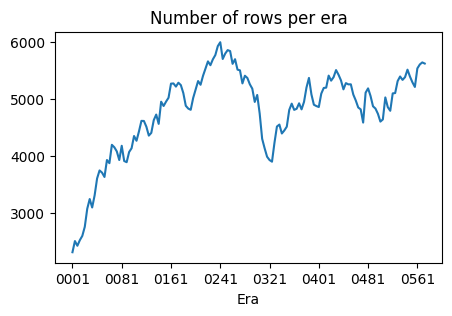

In [ ]:
# Plot the number of rows per era
train.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

### Target
The `target` is a measure of stock market returns over the next 20 (business) days. Specifically, it is a measure of "stock-specific" returns that are not explained by well-known "factors" or broader trends in the market, country, or sector. For example, if Apple went up and the tech sector also went up, we only want to know if Apple went up more or less than the tech sector.

Target values are binned into 5 unequal bins: `0`, `0.25`, `0.5`, `0.75`, `1.0`. Again, this heavy regularization of target values is to avoid overfitting as the underlying values are extremely noisy.

<Axes: title={'center': 'Target'}, xlabel='Value', ylabel='Frequency'>

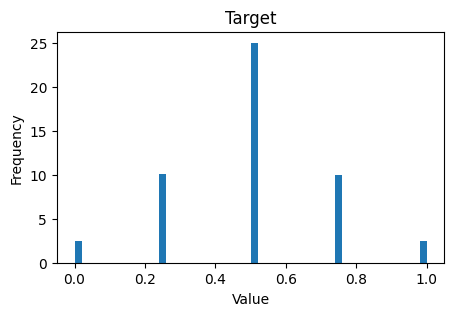

In [ ]:
# Plot density histogram of the target
train["target"].plot(
  kind="hist",
  title="Target",
  figsize=(5, 3),
  xlabel="Value",
  density=True,
  bins=50
)

### Features
The `features` are quantitative attributes of each stock: fundamentals like P/E ratio, technical signals like RSI, market data like short interest, secondary data like analyst ratings, and much more.

The underlying definition of each feature is not important, just know that Numerai has included these features in the dataset because we believe they are predictive of the `target` either by themselves or in combination with other features.

Feature values are binned into 5 equal bins: `0`, `1`, `2`, `3`, `4`. This heavy regularization of feature values is to avoid overfitting as the underlying values are extremely noisy. Unlike the target, these are integers instead of floats to reduce the storage needs of the overall dataset.

If data for a particular feature is missing for that era (more common in early `eras`), then all values will be set to `2`.

<Axes: title={'center': 'missing data'}, ylabel='Frequency'>

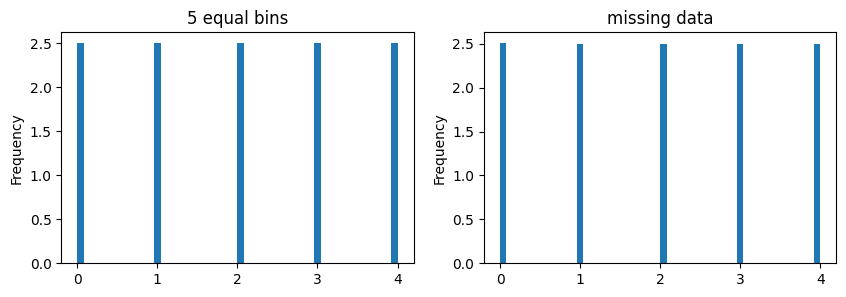

In [ ]:
c

## 2. Modeling
At a high level, our task is to model and predict the `target` using the `features`.

### Model training

You are free to use any tool or framework, but here we will be using LGBMRegressor, a popular choice amongst tournament participants. While you wait for the model to train, watch this [video](https://www.youtube.com/watch?v=w8Y7hY05z7k) to learn why tree-based models work so well on tabular datasets from our Chief Scientist MDO.

In [ ]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
import lightgbm as lgb

# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
model = lgb.LGBMRegressor(
  n_estimators=2000,
  learning_rate=0.01,
  max_depth=5,
  num_leaves=2**5-1,
  colsample_bytree=0.1
)
# We've found the following "deep" parameters perform much better, but they require much more CPU and RAM
# model = lgb.LGBMRegressor(
#     n_estimators=30_000,
#     learning_rate=0.001,
#     max_depth=10,
#     num_leaves=2**10,
#     colsample_bytree=0.1
#     min_data_in_leaf=10000,
# )

# This will take a few minutes üçµ
model.fit(
  train[feature_set],
  train["target"]
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3525
[LightGBM] [Info] Number of data points in the train set: 688184, number of used features: 705
[LightGBM] [Info] Start training from score 0.500008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
              n_estimators=2000)

### Validation predictions

Now let's make some out-of-sample predictions on the validation dataset to evaluate our model's performance.

In [ ]:
# Download validation data - this will take a few minutes
napi.download_dataset(f"{DATA_VERSION}/validation.parquet")

# Load the validation data and filter for data_type == "validation"
validation = pd.read_parquet(
    f"{DATA_VERSION}/validation.parquet",
    columns=["era", "data_type", "target"] + feature_set
)
validation = validation[validation["data_type"] == "validation"]
del validation["data_type"]

# Downsample to every 4th era to reduce memory usage and speedup evaluation (suggested for Colab free tier)
# Comment out the line below to use all the data (slower and higher memory usage, but more accurate evaluation)
validation = validation[validation["era"].isin(validation["era"].unique()[::4])]

# Eras are 1 week apart, but targets look 20 days (o 4 weeks/eras) into the future,
# so we need to "embargo" the first 4 eras following our last train era to avoid "data leakage"
last_train_era = int(train["era"].unique()[-1])
eras_to_embargo = [str(era).zfill(4) for era in [last_train_era + i for i in range(4)]]
validation = validation[~validation["era"].isin(eras_to_embargo)]

# Generate predictions against the out-of-sample validation features
# This will take a few minutes üçµ
validation["prediction"] = model.predict(validation[feature_set])
validation[["era", "prediction", "target"]]

v5.0/validation.parquet: 3.20GB [03:02, 17.5MB/s]                            


era  prediction  target
id                                        
n000c290e4364875  0579    0.491249    0.50
n002a15bc5575bbb  0579    0.505177    0.25
n00309caaa0f955e  0579    0.517842    0.75
n0039cbdcf835708  0579    0.495611    0.50
n004143458984f89  0579    0.496297    0.50
...                ...         ...     ...
nffa8c414845a031  1127    0.509274    0.50
nffb0047d0286c64  1127    0.501372    0.75
nffb29b13d911aaa  1127    0.514444    0.75
nffb37244ff34f68  1127    0.502564    0.75
nffb9ed28a77e554  1127    0.509611    0.75

[853017 rows x 3 columns]

### Performance evaluation

Numerai calculates scores designed to "align incentives" between your model and the hedge fund - a model with good scores should help the hedge fund make good returns. The primary scoring metrics in Numerai are:

- `CORR` (or "Correlation") which is calculated by the function `numerai_corr` - a Numerai specific variant of the Pearson Correlation between your model and the target.

- `MMC` (or "Meta Model Contribution") which is a calculated by the function `correlation_contribution` - a measure of how uniquely additive your model is to the Numerai Meta Model.

On the Numerai website you will see `CORR` referred to as `CORR20V2`, where the "20" refers to the 20-day return target and "v2" specifies that we are using the 2nd version of the scoring function.

In [ ]:
# install Numerai's open-source scoring tools
!pip install -q --no-deps numerai-tools

# import the 2 scoring functions
from numerai_tools.scoring import numerai_corr, correlation_contribution

# Download and join in the meta_model for the validation eras
napi.download_dataset(f"v4.3/meta_model.parquet", round_num=842)
validation["meta_model"] = pd.read_parquet(
    f"v4.3/meta_model.parquet"
)["numerai_meta_model"]

As mentioned above, it is important for us to score each historical `era` independantly. So when evaluating the performance of our model, we should be looking at the "per era" metrics.

One thing you may notice here is how low the scores are (in the range of +/- 0.05). This is very normal in the domain of quantitative finance and is part of the reason why we say Numerai is the "hardest data science tournament" in the world.

<Axes: title={'center': 'Validation MMC'}, xlabel='era'>

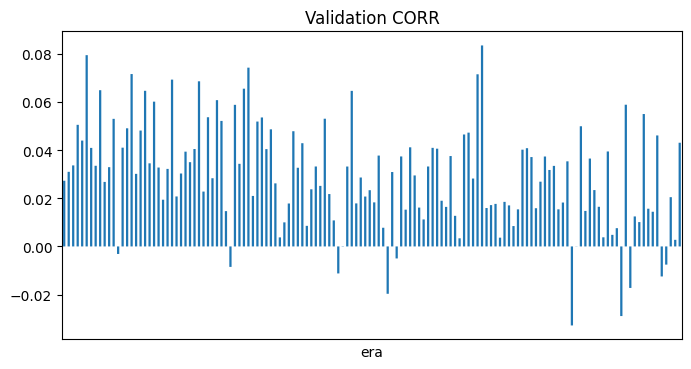

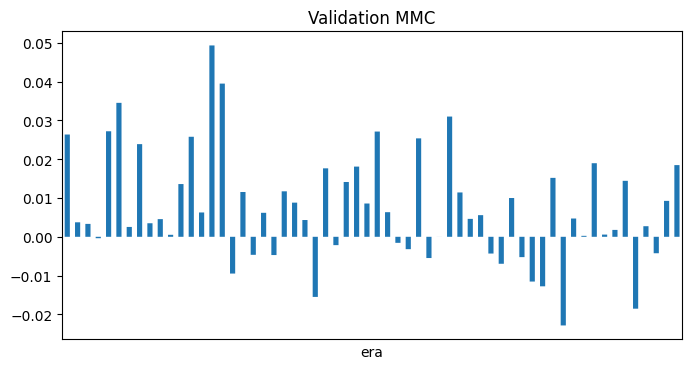

In [ ]:
# Compute the per-era corr between our predictions and the target values
per_era_corr = validation.groupby("era").apply(
    lambda x: numerai_corr(x[["prediction"]].dropna(), x["target"].dropna())
)

# Compute the per-era mmc between our predictions, the meta model, and the target values
per_era_mmc = validation.dropna().groupby("era").apply(
    lambda x: correlation_contribution(x[["prediction"]], x["meta_model"], x["target"])
)


# Plot the per-era correlation
per_era_corr.plot(
  title="Validation CORR",
  kind="bar",
  figsize=(8, 4),
  xticks=[],
  legend=False,
  snap=False
)
per_era_mmc.plot(
  title="Validation MMC",
  kind="bar",
  figsize=(8, 4),
  xticks=[],
  legend=False,
  snap=False
)

Instead of looking at the raw score for each era, it is helpful to look at the cumulative scores.

If you are familiar with "backtesting" in quant finance where people simulate the historical performance of their investment strategies, you can roughly think of this plot as a backtest of your model performance over the historical validation period.

Notice a few things below:

- CORR gradually increases over many eras of the validation data even with this simple model on modern data.

- MMC is generated over a smaller set of recent eras - this is because the validation time range pre-dates the Meta Model.

- MMC is very high early on in the Meta Model's existence, MMC - this is because the newest datasets were not available and models trained on the newest data are could have been very additive in the past.

- MMC is flat and decreasing recently because the Meta Model has started catching up to modern data sets and getting correlation has been difficult in recent eras.

<Axes: title={'center': 'Cumulative Validation MMC'}, xlabel='era'>

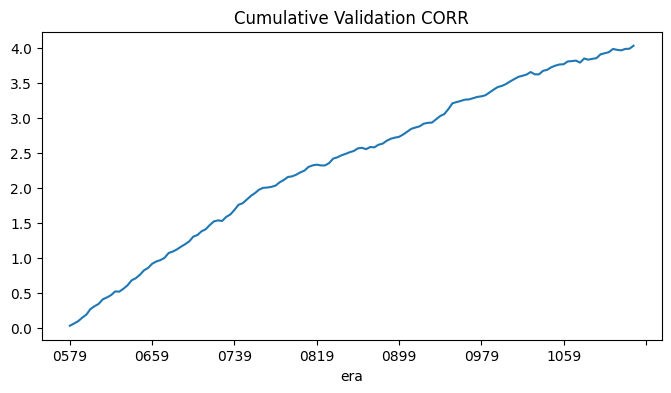

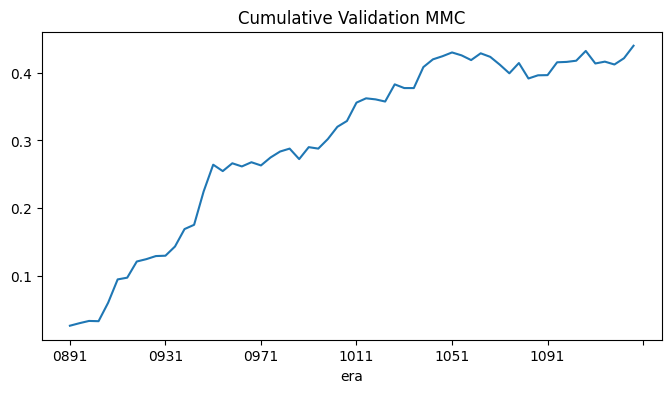

In [ ]:
# Plot the cumulative per-era correlation
per_era_corr.cumsum().plot(
  title="Cumulative Validation CORR",
  kind="line",
  figsize=(8, 4),
  legend=False
)
per_era_mmc.cumsum().plot(
  title="Cumulative Validation MMC",
  kind="line",
  figsize=(8, 4),
  legend=False
)

### Performance metrics

To evaluate the performance of our model, it is also helpful to compute some summary metrics over the entire validation period:

- `Mean` is the primary measure of your model's long-term performance.

- `Sharpe` is a measure of your model's consistency. In finance, the Sharpe ratio of an investment strategy measures risk adjusted returns. In Numerai, we compute sharpe as the mean divided by the standard deviation.

- `Max drawdown` is a measure of your model's risk. In finance, the max drawdown of an investment strategy is the largest loss suffered. In Numerai, we compute max drawdown as the maximum peak to trough drop in a cumulative score.

In [ ]:
# Compute performance metrics
corr_mean = per_era_corr.mean()
corr_std = per_era_corr.std(ddof=0)
corr_sharpe = corr_mean / corr_std
corr_max_drawdown = (per_era_corr.cumsum().expanding(min_periods=1).max() - per_era_corr.cumsum()).max()

mmc_mean = per_era_mmc.mean()
mmc_std = per_era_mmc.std(ddof=0)
mmc_sharpe = mmc_mean / mmc_std
mmc_max_drawdown = (per_era_mmc.cumsum().expanding(min_periods=1).max() - per_era_mmc.cumsum()).max()

pd.DataFrame({
    "mean": [corr_mean, mmc_mean],
    "std": [corr_std, mmc_std],
    "sharpe": [corr_sharpe, mmc_sharpe],
    "max_drawdown": [corr_max_drawdown, mmc_max_drawdown]
}, index=["CORR", "MMC"]).T

CORR  \
mean          prediction    0.029238
dtype: float64   
std           prediction    0.021963
dtype: float64   
sharpe        prediction    1.331223
dtype: float64   
max_drawdown  prediction    0.032897
dtype: float64   

                                                MMC  
mean          prediction    0.007333
dtype: float64  
std           prediction    0.014054
dtype: float64  
sharpe        prediction    0.521759
dtype: float64  
max_drawdown  prediction    0.038468
dtype: float64

These performance metrics above are not amazing but that's ok, we are just getting started. In the next few tutorials, you will learn how to improve our model performance.

## 3. Submissions

Unlike Kaggle competitions that evalute models based on <ins>test</ins> performance, Numerai evaluates models based based on <ins>live</ins> performance.

### Live predictions

Every Tuesday-Saturday, new `live features` are released, which represent the current state of the stock market.

Your task is to generate `live predictions` on the unknown target values, which represent stock market returns 20 days into the future.

In [ ]:
# Download latest live features
napi.download_dataset(f"{DATA_VERSION}/live.parquet")

# Load live features
live_features = pd.read_parquet(f"{DATA_VERSION}/live.parquet", columns=feature_set)

# Generate live predictions
live_predictions = model.predict(live_features[feature_set])

# Format submission
pd.Series(live_predictions, index=live_features.index).to_frame("prediction")

v5.0/live.parquet: 7.93MB [00:00, 12.3MB/s]                            


prediction
id                          
n0010b524b4f54c5    0.479025
n0010c45e0ffdfc3    0.520873
n0021b7acb16c138    0.495828
n002989248b0f148    0.503440
n00308342652732d    0.488648
...                      ...
nffc7d5c3bb883aa    0.510946
nffd2ddf669b3c4c    0.490445
nffd838736b2cb68    0.497424
nffea35973af0581    0.496287
nfff17061c841a61    0.484322

[6360 rows x 1 columns]

### Model upload

To participate in the tournament, you must submit live predictions every Tuesday-Saturday.

To automate this process, you can simply:
- Define your prediction pipeline as a function
- Serialize your function using the `cloudpickle` library
- Upload your model pickle file to Numerai
- Let Numerai run your model to submit live predictions every day

Read more about Model Uploads and other self-hosted automation options in our [docs](https://docs.numer.ai/numerai-tournament/submissions#automation).


In [ ]:
# Define your prediction pipeline as a function
def predict(live_features: pd.DataFrame) -> pd.DataFrame:
    live_predictions = model.predict(live_features[feature_set])
    submission = pd.Series(live_predictions, index=live_features.index)
    return submission.to_frame("prediction")

In [ ]:
# Use the cloudpickle library to serialize your function
import cloudpickle
p = cloudpickle.dumps(predict)
with open("hello_numerai.pkl", "wb") as f:
    f.write(p)

In [ ]:
# Download file if running in Google Colab
try:
    from google.colab import files
    files.download('hello_numerai.pkl')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

That's it! You now have a pickle file that is ready for upload.

Head back to the [Hello Numerai Tutorial](https://numer.ai/tutorial/hello-numerai) to upload your model!